# Coin toss quantum circuit
In this exercise we create a quantum circuit that simulates the probabilistic nature of a single qubit in superposition. The one qubit circuit initializes the qubit in the ground state $|0\rangle$ and then uses a Hadamard gate to put the qubit in superposition $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$  
Measuring the qubit causes it to collapse into one of the states $|0\rangle$ or $|1\rangle$ with a 50% probability, i.e. a coin toss.   
In this exercise we introduce the Hadamard gate, which puts a qubit in superposition.  

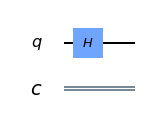


In [1]:
from qiskit import QuantumCircuit, execute, Aer

# Import visualization
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere


As we will be using the Bloch sphere visualization (`plot_bloch_multivector`) a bit, here's a quick function that calculates the state vector ($|\psi\rangle$) for the circuit to let you display the Bloch vector for any given state.


In [2]:
def get_psi(circuit): 
    global psi
    backend = Aer.get_backend('statevector_simulator') 
    psi = execute(circuit, backend).result().get_statevector(circuit)
    display(plot_bloch_multivector(psi))

Create an empty quantum circuit. We start out with the qubit in the $|0\rangle$ state.

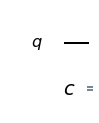

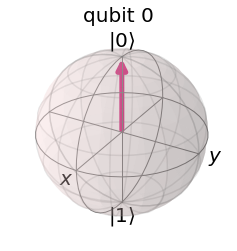

In [3]:
qc = QuantumCircuit(1,1)

# Print out the circuit
display(qc.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc)

Add a Hadamard (super position) gate to the quantum circuit. This puts the qubit in a superposition: $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$

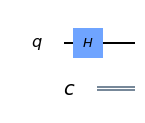

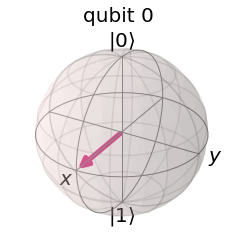

In [4]:
qc.h(0)

# Print out the circuit
display(qc.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc)


Finally, add a measurement gate to complete the circuit.

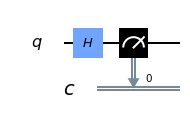

In [5]:
# Add measure gate
qc.measure(0,0)
display(qc.draw(output="mpl"))


Set the backend to a local simulator.

In [6]:
backend = Aer.get_backend('qasm_simulator')

Create a quantum job that runs just one shot to simulate a coin toss. Then run the job and display the result; either 0 for up (base) or 1 for down (excited). Display the result as a histogram.

{'1': 1}


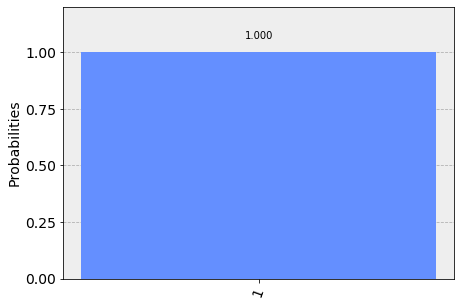

In [7]:
job = execute(qc, backend, shots=1)
counts  = job.result().get_counts()
print(counts)
plot_histogram(counts)

# Adding some statistics
**Now, it is your turn!** Just running the circuit once gives you a single quantum outcome, 0 or 1. But generally that cingle result might not be useful, and you want to see some statistics of the potential outcome space. Lets run a thousand coin tosses in a row, print the outcome and display it in a histogram. With what probability do you expect to get 0 and 1? Do the results match your expectation? 

**Tip:** You can modify the previous commands, or create a new execution by adding code in the next window.

{'0': 520, '1': 480}


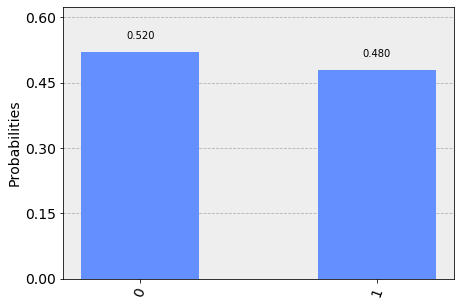

In [8]:
# Add your code here 

job_2 = execute(qc, backend, shots=1000)
counts2  = job_2.result().get_counts()
print(counts2)
plot_histogram(counts2)

# Tossing with heads or tails up
**Some more work for you!** We can also do our coin flip with the qubit starting in the $|1\rangle$ state by first flipping the qubit by using the X gate. The Hadamard gate still flips the qubit to the equator, but now on the -X side. Would you expect any difference in the outcome. 

For this exercise we introduce the X gate that flips the qubit from $|0\rangle$ to $|1\rangle$ and vice versa.
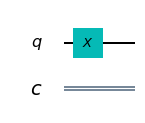

**Tip:** You can modify the previous commands, or create and execute a new circuit, adding the gates, and then running the circuit and displaying the results by adding code in the next window. 

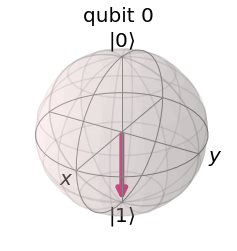

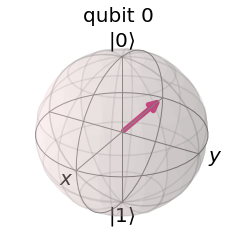

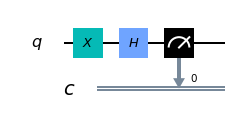

{'0': 490, '1': 510}


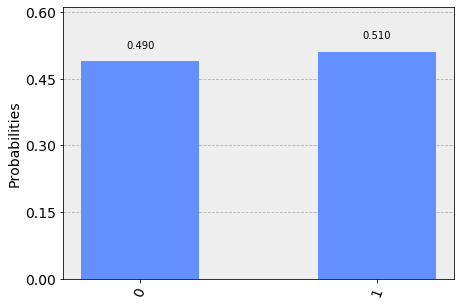

In [9]:
# Add your code here 

qc2 = QuantumCircuit(1,1)
qc2.x(0)

get_psi(qc2)

qc2.h(0)
get_psi(qc2)

qc2.measure(0,0)
display(qc2.draw(output="mpl"))

job2 = execute(qc2, backend, shots=1000)
counts2  = job2.result().get_counts()
print(counts2)
plot_histogram(counts2)



# Cheating coin toss quantum circuit
So, the X gate didn't make much of a difference; our coin toss is pretty fair. So, what can we do about this? Can we tweak the probabilistic nature of a single qubit in superposition? Can we cheat in coin tossing?

Like before we put the qubit in superposition $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$  
We then add an additional Ry (rotation around the Y axis) gate, which pushes the Bloch vector $\pi/8$ closer to $|1\rangle$. we tweak the odds in favor of $|1\rangle$. The expected outcome is now $|0\rangle$ ~ 33% and $|1\rangle$ with a 66% probability.

In this exercise we introduce the Ry gate, which rotates a qubit around the y-axis.
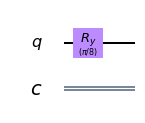


Add a Hadamard (super position) gate to the quantum circuit. This puts the qubit in a superposition: $|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$

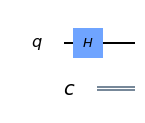

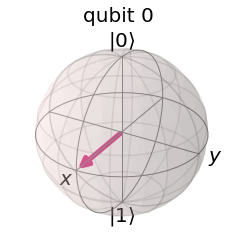

In [10]:
qc3 = QuantumCircuit(1,1)
qc3.h(0)

display(qc3.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc3)


Now, let's rotate the Bloch vector vector $\pi$/8 radians closer to $|1\rangle$ by adding a Y rotation gate.

For the rotation gate we need to use $\pi$, which we import from Python math.

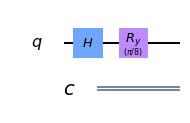

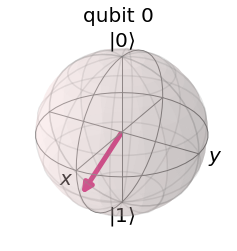

In [11]:
from math import pi

qc3.ry(pi/8,0) 
#Move the Bloch vector pi/8 radians closer to |1>. 
display(qc3.draw(output="mpl"))

# Display the Bloch sphere
get_psi(qc3)

Add measurement and then run the circuit on a local simulator like before.


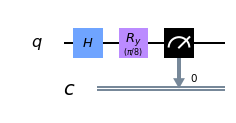

{'0': 308, '1': 692}


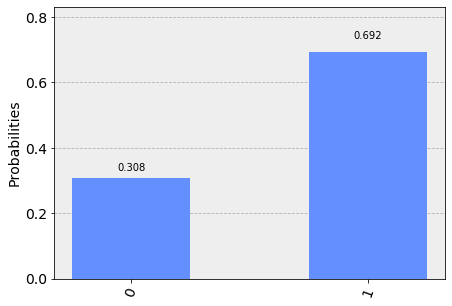

In [12]:
qc3.measure(0,0)
display(qc3.draw(output="mpl"))

backend = Aer.get_backend('qasm_simulator')

job3 = execute(qc3, backend, shots=1000)
result3 = job3.result()
counts3  = result3.get_counts(qc3)
print(counts3)
plot_histogram(counts3)

Notice the change inprobability for getting 0 and 1. The slight tweak of the Bloch vector towards |1> turns out to have a massive result in that ~70% of the coin tosses are now |1>.

##### Retweak your quantum coin to your advantage
**Your turn again!** Now go ahead and change the probability for your coin toss to be ~75% chance to get the result 0.

**Tip:** You can modify the previous commands, or create and execute a new circuit, adding the gates, and then running the circuit and displaying the results by adding code in the next window. 

**Challenge:** Can you get the same results *without* using the Hadamard gate?

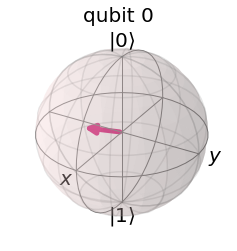

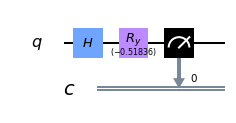

{'0': 777, '1': 223}


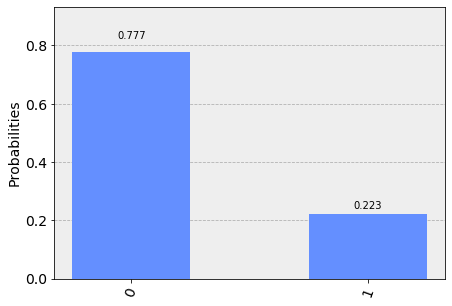

In [13]:
# Your code goes here

qc4 = QuantumCircuit(1,1)
qc4.h(0)
qc4.ry(33*-pi/200,0) 

# Or without H gate...

#qc4.ry(67*pi/200,0) 


# Display the Bloch sphere
get_psi(qc4)

qc4.measure(0,0)

display(qc4.draw(output="mpl"))

backend = Aer.get_backend('qasm_simulator')

job4 = execute(qc4, backend, shots=1000)
result4 = job4.result()
counts4  = result4.get_counts(qc4)
print(counts4)
plot_histogram(counts4)

Congratulations, you now know how to cheat in coin tossing. Next stop Las Vegas! As you have seen, you are not *required* to use the Hadamard gate to put your qubit in a superposition, any rotational gate along the X or Y axis will do. The Hadamard gate is just a very handy gate to initialize your qubit for further computing.

# Tossing your coin on an IBM quantum computer
In this exercise we run our simple coin toss circuit on a real IBM Q quantum computer. For a local Qiskit installation we need to store our IBM Q credentials locally to be able to access the IBM Q backends.
We use the `least_busy` method to find the backend with the smallest queue.

In [14]:
# Import IBMQ and the job monitoring tool
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

**Time for some work!** Before you can run your program on IBM Q you must load your API key. If you are running this notebook in an IBM Qx environment, your API key is already stored in the system, but if you are running on your own machine you [must first store the key](https://qiskit.org/documentation/install.html#access-ibm-q-systems).

In [15]:
#Save and store API key locally.
from qiskit import IBMQ
#IBMQ.save_account('MY_API_TOKEN') <- Uncomment this line if you need to store your API key

#Load account information 
IBMQ.load_account()
provider = IBMQ.get_provider()

Set the backend to the least busy IBM quantum computer. We filter out simulators. We also want to know how long the quque is.

In [16]:
backend = least_busy(provider.backends(operational=True, simulator=False))
print(backend.configuration().backend_name)
print(backend.status().pending_jobs)

ibmqx2
1


Create a quantum job for your circuit and the selected backend that runs 1,000 shots to simulate a series of coin tosses. Run the job and monitor the progress. Get and display the results.

Job Status: job has successfully run
{'0': 695, '1': 305}


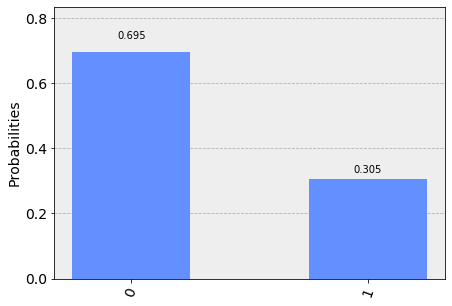

In [17]:
job_ibmq = execute(qc4, backend, shots=1000)
job_monitor(job_ibmq)

counts_ibmq  = job_ibmq.result().get_counts(qc4)

print(counts_ibmq)  
plot_histogram(counts_ibmq)

And a final congratulation for this exercise. You have just run your first quantum program on a bona-fide IBM quantum computer.